# Tic - Toc

In [ ]:
# conda update mkl

In [ ]:
# pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:

# pip install matplotlib

In [ ]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

# Synthetic Example

The input data is the noisy data, while the target is the clean data. Here, the DDAE works in a supervised way to reconstruct the clean data from the noisy data.

In [ ]:

from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, average
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
# from keras.layers.normalization import BatchNormalization
from keras import regularizers

#import theano
#import theano.tensor as T
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
#import theano.tensor as T

import numpy as np
import matplotlib.pyplot as plt

#corr1=0.03
#corr2=0.98
#corr3=0.87

#corr1=0.015
#corr2=0.790
#corr3=0.620


corr1=0
corr2=1
corr3=1
win = 256

mat = scipy.io.loadmat ('DDAE_SYN.mat')
dataNoise = mat['dn']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))

dataNoise1= mat['d']
dataNoise1 = np.transpose(dataNoise1)
dataNoise1 = np.reshape(dataNoise1,(256,int(np.shape(dataNoise1)[0]*np.shape(dataNoise1)[1]/256 )))
dataNoise1 = np.transpose(dataNoise1)
dataNoise1 = np.reshape(dataNoise1, (dataNoise1.shape[0],dataNoise1.shape[1]))


INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]

input_img = Input(shape=(INPUT_SIZE2,))


encoded1 = Dense(512, activation='relu')(input_img)
encoded2 = Dense(256, activation='relu')(encoded1)
encoded3 = Dense(128, activation='relu' )(encoded2)


decoded1 = Dense(128, activation='relu' )(encoded3)
decoded2 = Dense(256, activation='relu')(decoded1)
decoded3 = Dense(512, activation='relu' )(decoded2)


decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)


autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001)
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =64

tic()
history = autoencoder.fit(dataNoise,dataNoise1, epochs=50, batch_size=batch, shuffle=True)
toc()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 512)               131584

# Plotting the Synthetic Example



In [ ]:

mat = scipy.io.loadmat ('DDAE_SYN.mat')
dataNoise = mat['dn']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
out = autoencoder.predict(dataNoise)

dataNoise = mat['dn']
dataNoise = np.transpose(dataNoise)
out = np.transpose(out)
out = np.reshape(out,(np.shape(dataNoise)[0], np.shape(dataNoise)[1]))


3/3 [==============================] - 0s 7ms/step


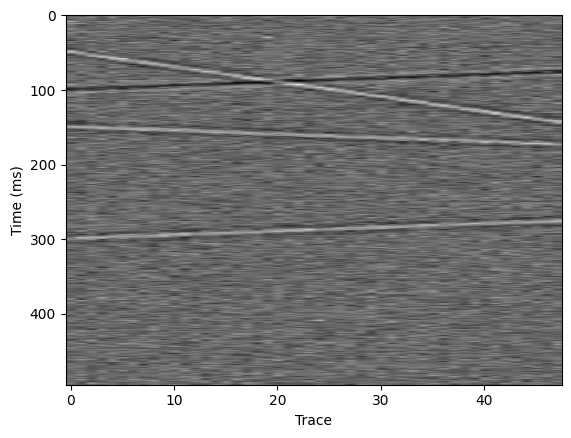

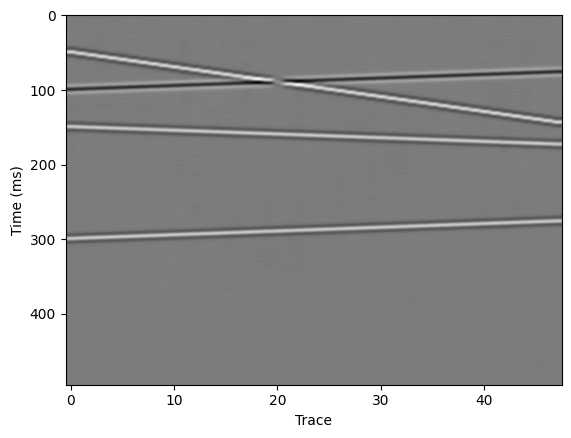

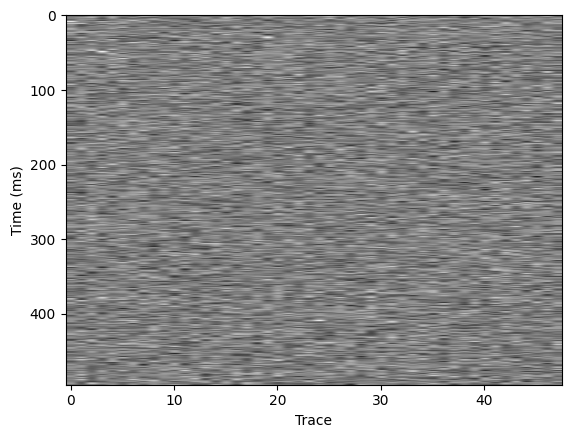

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(np.transpose(dataNoise), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Data Noise')
plt.show()

plt.figure()
plt.imshow(np.transpose(out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Output')
plt.show()

plt.figure()
plt.imshow(np.transpose(dataNoise - out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Difference')
plt.show()


# Saving the DDAE Parameters as Json file


In [ ]:
from keras.models import model_from_json
from keras.models import load_model

model_json = autoencoder.to_json()
with open("Intial.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("Intial_synW.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, average
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
# from keras.layers.normalization import BatchNormalization
from keras import regularizers

#import theano
#import theano.tensor as T
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
#import theano.tensor as T

import numpy as np
import matplotlib.pyplot as plt

#corr1=0.03
#corr2=0.98
#corr3=0.87

#corr1=0.015
#corr2=0.790
#corr3=0.620


corr1=0
corr2=1
corr3=1
win = 256

mat = scipy.io.loadmat ('SYN001.mat')
dataNoise = mat['dn01']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))

dataNoise1= mat['d01']
dataNoise1 = np.transpose(dataNoise1)
dataNoise1 = np.reshape(dataNoise1,(256,int(np.shape(dataNoise1)[0]*np.shape(dataNoise1)[1]/256 )))
dataNoise1 = np.transpose(dataNoise1)
dataNoise1 = np.reshape(dataNoise1, (dataNoise1.shape[0],dataNoise1.shape[1]))


INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]

input_img = Input(shape=(INPUT_SIZE2,))


encoded1 = Dense(512, activation='relu')(input_img)
encoded2 = Dense(256, activation='relu')(encoded1)
encoded3 = Dense(128, activation='relu' )(encoded2)


decoded1 = Dense(128, activation='relu' )(encoded3)
decoded2 = Dense(256, activation='relu')(decoded1)
decoded3 = Dense(512, activation='relu' )(decoded2)


decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)


autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001)
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =64

tic()
history = autoencoder.fit(dataNoise,dataNoise1, epochs=50, batch_size=batch, shuffle=True)
toc()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 512)               1315

In [ ]:

mat = scipy.io.loadmat ('SYN001.mat')
dataNoise = mat['dn01']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
out = autoencoder.predict(dataNoise)

dataNoise = mat['dn01']
dataNoise = np.transpose(dataNoise)
out = np.transpose(out)
out = np.reshape(out,(np.shape(dataNoise)[0], np.shape(dataNoise)[1]))


16/16 [==============================] - 0s 4ms/step


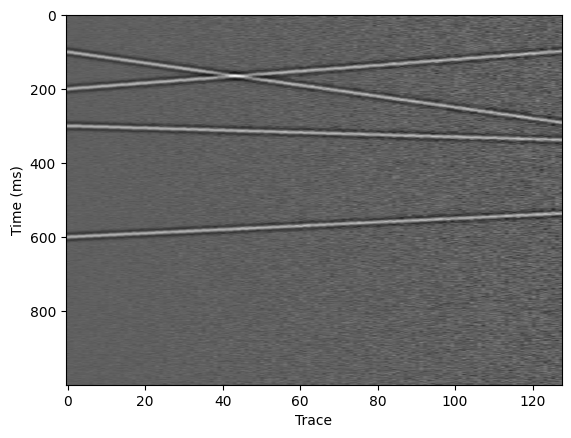

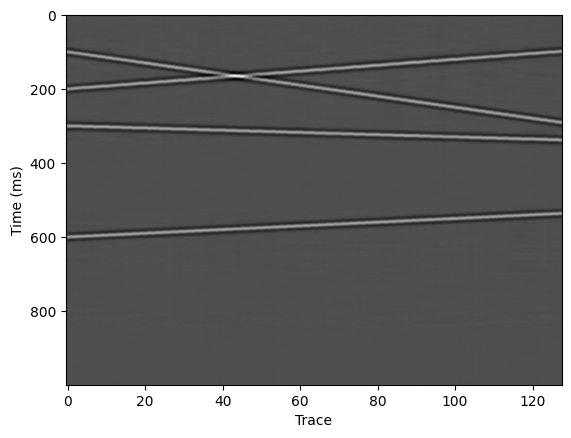

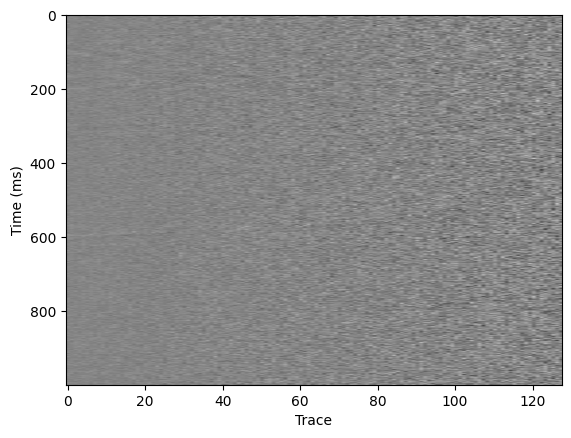

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(np.transpose(dataNoise), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Data Noise')
plt.show()

plt.figure()
plt.imshow(np.transpose(out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Output')
plt.show()

plt.figure()
plt.imshow(np.transpose(dataNoise - out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Difference')
plt.show()


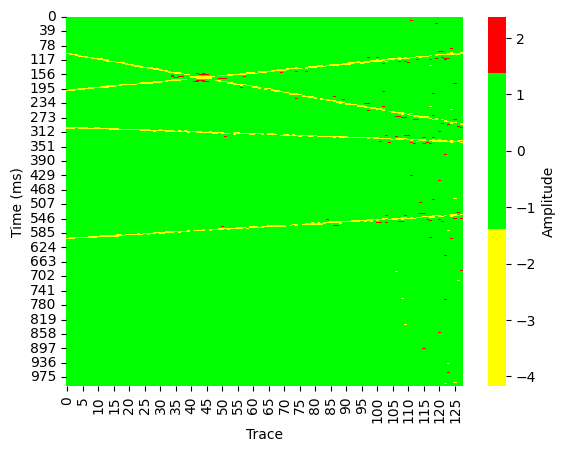

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define colors
red = '#FF0000'
yellow = '#FFFF00'
green = '#00FF00'

# Create a gradient colormap
cmap = sns.color_palette([yellow, green, red], as_cmap=True)

# Example usage with heatmap
# heatmap_data = ... # your data here
# plt.imshow(heatmap_data, cmap=cmap, vmin=-1, vmax=1)

# create a matrix of differences
diff_matrix = np.transpose(dataNoise) - np.transpose(out) * 2

# create a heatmap using seaborn
ax = sns.heatmap(diff_matrix, cmap=cmap, center=0)

# Set the colorbar title
cbar = ax.collections[0].colorbar
cbar.set_label('Amplitude')

plt.xlabel('Trace')
plt.ylabel('Time (ms)')
plt.show()


In [ ]:
import numpy as np

# Assuming you have already denoised the synthetic seismic data and obtained the denoised signal component
denoised_signal = np.transpose(dataNoise) # Denoised signal component

mat = scipy.io.loadmat ('SYN001.mat')
dataNoise = mat['dn01']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
# Assuming you have the original noisy synthetic seismic data
noisy_data = dataNoise  # Original noisy synthetic seismic data

# Calculate the residual noise component
residual_noise = noisy_data - denoised_signal

# Calculate the mean and standard deviation of the denoised signal component
signal_mean = np.mean(denoised_signal)
signal_std = np.std(denoised_signal)

# Calculate the mean and standard deviation of the residual noise component
noise_mean = np.mean(residual_noise)
noise_std = np.std(residual_noise)

# Add a small constant to the noise standard deviation to avoid division by zero
epsilon = 1e-10  # Small constant
adjusted_noise_std = noise_std + epsilon

# Calculate the signal-to-noise ratio (SNR) after denoising
snr = signal_mean / adjusted_noise_std
snr_db = 10 * np.log10(snr)

# Print the SNR after denoising
print("SNR after denoising: {:.2f} dB".format(snr_db))


ValueError: ignored

In [ ]:

from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, average
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
# from keras.layers.normalization import BatchNormalization
from keras import regularizers

#import theano
#import theano.tensor as T
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
#import theano.tensor as T

import numpy as np
import matplotlib.pyplot as plt

#corr1=0.03
#corr2=0.98
#corr3=0.87

#corr1=0.015
#corr2=0.790
#corr3=0.620


corr1=0
corr2=1
corr3=1
win = 256

mat = scipy.io.loadmat ('SYN002.mat')
dataNoise = mat['dn02']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))

dataNoise1= mat['d02']
dataNoise1 = np.transpose(dataNoise1)
dataNoise1 = np.reshape(dataNoise1,(256,int(np.shape(dataNoise1)[0]*np.shape(dataNoise1)[1]/256 )))
dataNoise1 = np.transpose(dataNoise1)
dataNoise1 = np.reshape(dataNoise1, (dataNoise1.shape[0],dataNoise1.shape[1]))


INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]

input_img = Input(shape=(INPUT_SIZE2,))


encoded1 = Dense(512, activation='relu')(input_img)
encoded2 = Dense(256, activation='relu')(encoded1)
encoded3 = Dense(128, activation='relu' )(encoded2)


decoded1 = Dense(128, activation='relu' )(encoded3)
decoded2 = Dense(256, activation='relu')(decoded1)
decoded3 = Dense(512, activation='relu' )(decoded2)


decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)


autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001)
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =64

tic()
history = autoencoder.fit(dataNoise,dataNoise1, epochs=50, batch_size=batch, shuffle=True)
toc()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_14 (Dense)            (None, 512)               131584    
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dense_19 (Dense)            (None, 512)               1315

In [ ]:

mat = scipy.io.loadmat ('SYN002.mat')
dataNoise = mat['dn02']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
out = autoencoder.predict(dataNoise)

dataNoise = mat['dn02']
dataNoise = np.transpose(dataNoise)
out = np.transpose(out)
out = np.reshape(out,(np.shape(dataNoise)[0], np.shape(dataNoise)[1]))


16/16 [==============================] - 0s 3ms/step


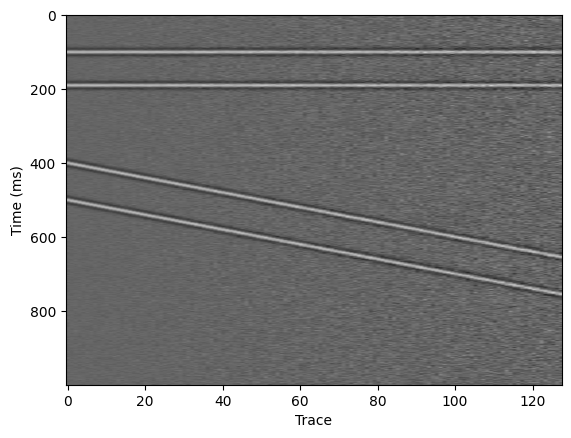

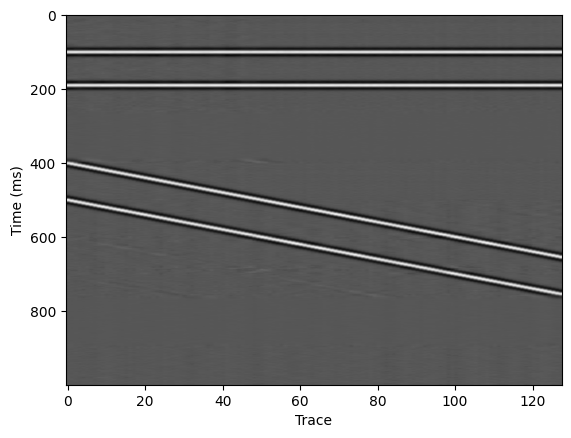

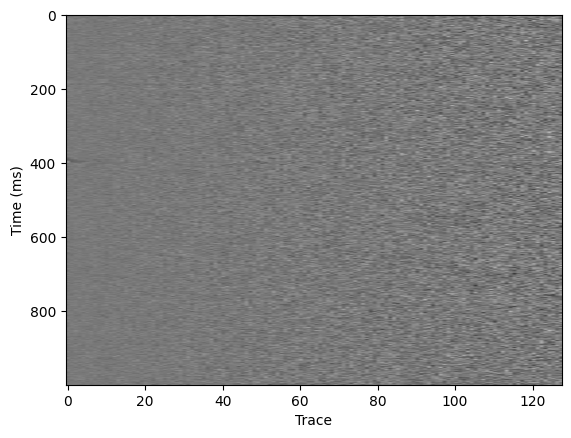

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(np.transpose(dataNoise), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Data Noise')
plt.show()

plt.figure()
plt.imshow(np.transpose(out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Output')
plt.show()

plt.figure()
plt.imshow(np.transpose(dataNoise - out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Difference')
plt.show()


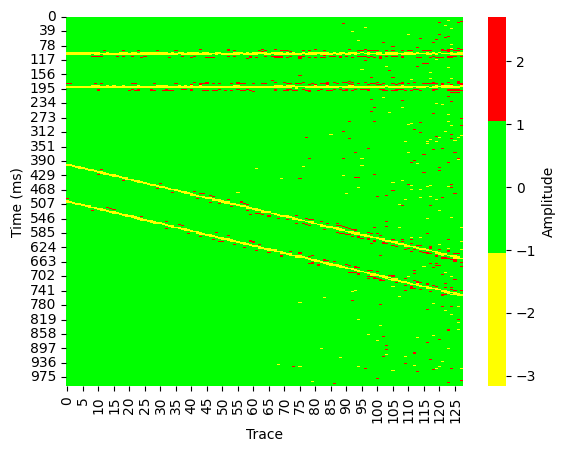

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define colors
red = '#FF0000'
yellow = '#FFFF00'
green = '#00FF00'

# Create a gradient colormap
cmap = sns.color_palette([yellow, green, red], as_cmap=True)

# Example usage with heatmap
# heatmap_data = ... # your data here
# plt.imshow(heatmap_data, cmap=cmap, vmin=-1, vmax=1)

# create a matrix of differences
diff_matrix = np.transpose(dataNoise) - np.transpose(out) * 2

# create a heatmap using seaborn
ax = sns.heatmap(diff_matrix, cmap=cmap, center=0)

# Set the colorbar title
cbar = ax.collections[0].colorbar
cbar.set_label('Amplitude')

plt.xlabel('Trace')
plt.ylabel('Time (ms)')
plt.show()


In [ ]:

from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, average
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
# from keras.layers.normalization import BatchNormalization
from keras import regularizers

#import theano
#import theano.tensor as T
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
#import theano.tensor as T

import numpy as np
import matplotlib.pyplot as plt

#corr1=0.03
#corr2=0.98
#corr3=0.87

#corr1=0.015
#corr2=0.790
#corr3=0.620


corr1=0
corr2=1
corr3=1
win = 256

mat = scipy.io.loadmat ('SYN003.mat')
dataNoise = mat['dn03']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))

dataNoise1= mat['d03']
dataNoise1 = np.transpose(dataNoise1)
dataNoise1 = np.reshape(dataNoise1,(256,int(np.shape(dataNoise1)[0]*np.shape(dataNoise1)[1]/256 )))
dataNoise1 = np.transpose(dataNoise1)
dataNoise1 = np.reshape(dataNoise1, (dataNoise1.shape[0],dataNoise1.shape[1]))


INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]

input_img = Input(shape=(INPUT_SIZE2,))


encoded1 = Dense(512, activation='relu')(input_img)
encoded2 = Dense(256, activation='relu')(encoded1)
encoded3 = Dense(128, activation='relu' )(encoded2)


decoded1 = Dense(128, activation='relu' )(encoded3)
decoded2 = Dense(256, activation='relu')(decoded1)
decoded3 = Dense(512, activation='relu' )(decoded2)


decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)


autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001)
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =64

tic()
history = autoencoder.fit(dataNoise,dataNoise1, epochs=50, batch_size=batch, shuffle=True)
toc()



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_21 (Dense)            (None, 512)               131584    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dense_26 (Dense)            (None, 512)               1315

In [ ]:

mat = scipy.io.loadmat ('SYN003.mat')
dataNoise = mat['dn03']
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise,(256,int(np.shape(dataNoise)[0]*np.shape(dataNoise)[1]/win )))
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
out = autoencoder.predict(dataNoise)

dataNoise = mat['dn03']
dataNoise = np.transpose(dataNoise)
out = np.transpose(out)
out = np.reshape(out,(np.shape(dataNoise)[0], np.shape(dataNoise)[1]))


16/16 [==============================] - 0s 4ms/step


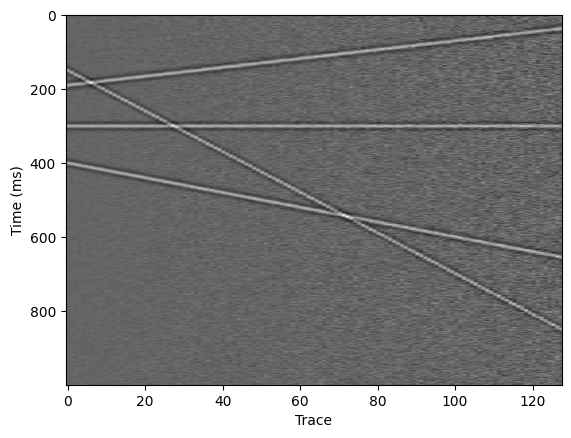

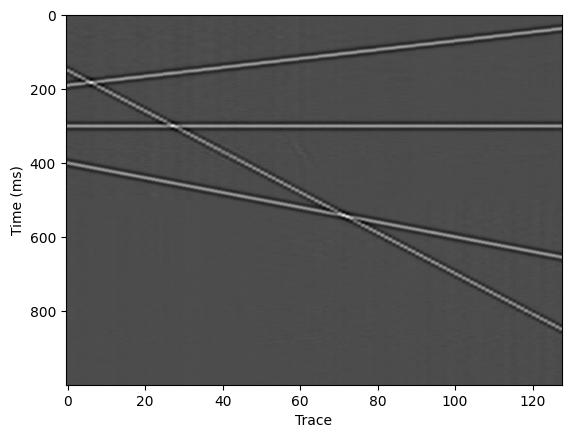

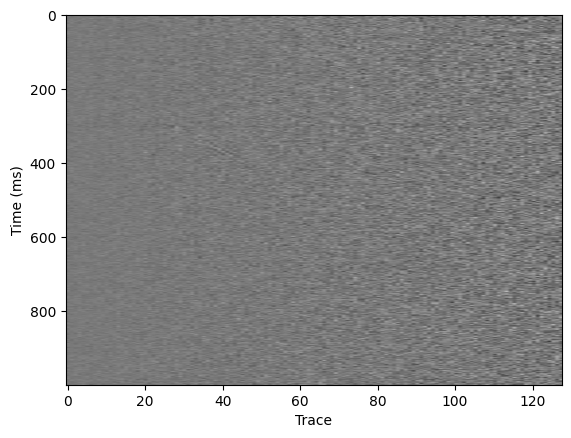

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(np.transpose(dataNoise), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Data Noise')
plt.show()

plt.figure()
plt.imshow(np.transpose(out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Output')
plt.show()

plt.figure()
plt.imshow(np.transpose(dataNoise - out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Difference')
plt.show()


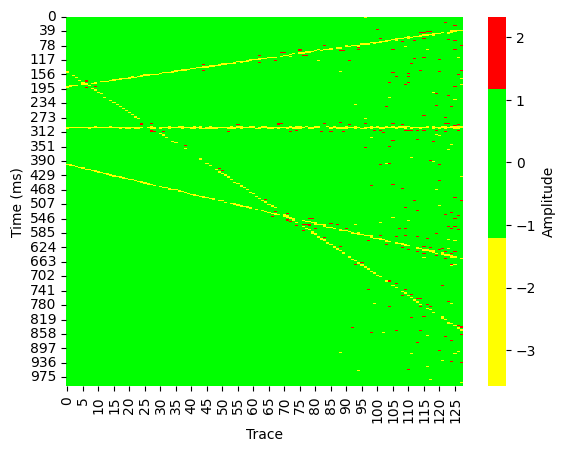

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define colors
red = '#FF0000'
yellow = '#FFFF00'
green = '#00FF00'

# Create a gradient colormap
cmap = sns.color_palette([yellow, green, red], as_cmap=True)

# Example usage with heatmap
# heatmap_data = ... # your data here
# plt.imshow(heatmap_data, cmap=cmap, vmin=-1, vmax=1)

# create a matrix of differences
diff_matrix = np.transpose(dataNoise) - np.transpose(out) * 2

# create a heatmap using seaborn
ax = sns.heatmap(diff_matrix, cmap=cmap, center=0)

# Set the colorbar title
cbar = ax.collections[0].colorbar
cbar.set_label('Amplitude')

plt.xlabel('Trace')
plt.ylabel('Time (ms)')
plt.show()


Text(50.722222222222214, 0.5, 'Time (s)')

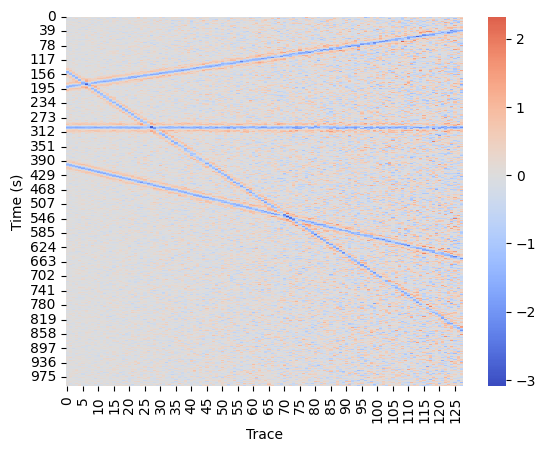

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a diverging colormap
cmap = 'coolwarm'

# create a matrix of differences
diff_matrix = np.transpose(dataNoise) - np.transpose(out) * 2

# create a heatmap using seaborn
sns.heatmap(diff_matrix, cmap=cmap, center=0)
plt.xlabel('Trace')
plt.ylabel('Time (s)')


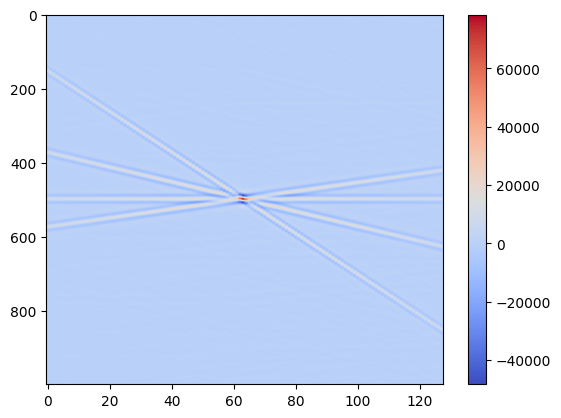

In [ ]:
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt

def local_similarity_map(data, template):
    # Normalize the data and template
    normalized_data = (data - np.mean(data)) / np.std(data)
    normalized_template = (template - np.mean(template)) / np.std(template)

    # Perform cross-correlation
    similarity_map = correlate2d(normalized_data, normalized_template, mode='same', boundary='fill', fillvalue=0)

    return similarity_map

# Example usage
data = dataNoise  # Replace with your own data
template = out  # Replace with your own template

similarity_map = local_similarity_map(data, template)

# Swap x-axis with y-axis
swapped_similarity_map = np.transpose(similarity_map)

# Plot the similarity map with swapped axes
plt.imshow(swapped_similarity_map, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.show()


# Loading the DDAE Parameters for the Initialization of the Field Model.


In [ ]:
from keras.models import model_from_json
from keras.models import load_model

# load json and create model
json_file = open('Intial.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
DDAE = model_from_json(loaded_model_json)

# load weights into new model
DDAE.load_weights("Intial_synW.h5")
print("Loaded model from disk")

Loaded model from disk


# Field Example

The input data is noisy data. Here, the DDAE works in an unsupervised way by utilizing the customize loss function (cross-correlation loss function). The DDAE parameters have been initialized using the parameters obtained by the synthetic example.

In [ ]:
!pip install obspy

In [ ]:
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")
start = "2002-1-01T00:00:00"
real_data = []
for i in range(0,256):
  st = UTCDateTime(start)
  et = st + 12.8
  inv = client.get_waveforms(network="YL",
                            station = "BIRA",
                            location = "*",
                            channel = "BHZ",
                            starttime=st,
                            endtime=et)
  start = et+100
  real_data.append(inv[0].data)

In [ ]:
inv[0].stats

In [ ]:
from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, Average, Lambda, Conv1D,LeakyReLU
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
import numpy as np
import matplotlib.pyplot as plt



corr1=0
corr2=1
corr3=1

mat = scipy.io.loadmat ('NEWREAL3_1.mat')
dataNoise = mat['dn1']
print(dataNoise.shape)
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
print(dataNoise.shape)
INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]


input_img = Input(shape=(INPUT_SIZE2,))


# Encoder
encoded1 = Dense(512, activation = 'relu')(input_img)
encoded2 = Dense(256, activation = 'relu')(encoded1)
encoded3 = Dense(128, activation = 'relu')(encoded2)

# Decoder
decoded1 = Dense(128, activation = 'relu')(encoded3)
decoded2 = Dense(256, activation = 'relu')(decoded1)
decoded3 = Dense(512, activation = 'relu')(decoded2)

# Final Layer
decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)




def correlation_coefficient_loss(y_true, y_pred):
    #optional
    x = y_true - y_pred
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den
    r =  corr1 -r

    #1
    x1 = y_true
    y1 = y_pred
    mx1 = K.mean(x1)
    my1 = K.mean(y1)
    xm1, ym1 = x1-mx1, y1-my1
    r_num1 = K.sum(tf.multiply(xm1,ym1))
    r_den1 = K.sqrt(tf.multiply(K.sum(K.square(xm1)), K.sum(K.square(ym1))))
    r1 = r_num1 / r_den1
    r1 = corr2 -  r1

    # Optional
    '''
    x2 = y_true-y_pred
    y2 = y_true
    mx2 = K.mean(x2)
    my2 = K.mean(y2)
    xm2, ym2 = x2-mx2, y2-my2
    r_num2 = K.sum(tf.multiply(xm2,ym2))
    r_den2 = K.sqrt(tf.multiply(K.sum(K.square(xm2)), K.sum(K.square(ym2))))
    r2 = r_num2 / r_den2
    r2 =    corr3 - (K.maximum(K.minimum(r2, 1.0), -1.0))
    '''
    return   K.square(r1) + K.square(r)




autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001) #I made a change here
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss=[correlation_coefficient_loss])
#autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =INPUT_SIZE2

# Initialization of the DDAE parameters using the parameters obtained by the synthetic example,
#in the paper we use more than one synthetich examples to obtain these parameters. However, here,
#we just show the flow of the DDAE by using only one synthetic example.

for i in range(2,7):
    w = DDAE.layers[i].get_weights()
    autoencoder.layers[i].set_weights(w)

tic()
history = autoencoder.fit(dataNoise,dataNoise, epochs=500, batch_size=batch, shuffle=True)
toc()



(512, 128)
(128, 512)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 256)               33024     
                                                                 
 dense_33 (Dense)            (None, 5

In [ ]:
dataNoise.dtype

dtype('<f8')

In [ ]:
type(dataNoise)

numpy.ndarray

In [ ]:
dataNoise.shape

(128, 512)

# Plotting the Field example.

In [ ]:
out = autoencoder.predict(dataNoise)


4/4 [==============================] - 0s 9ms/step


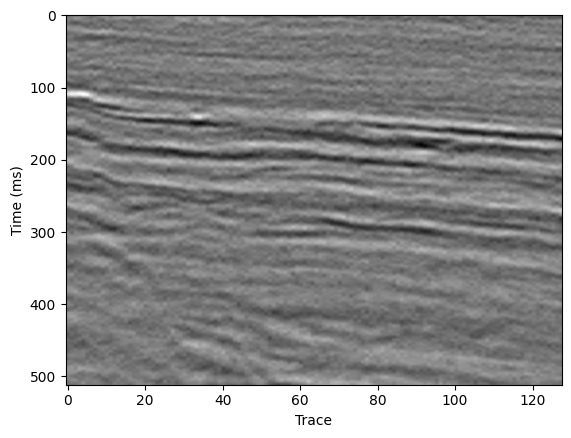

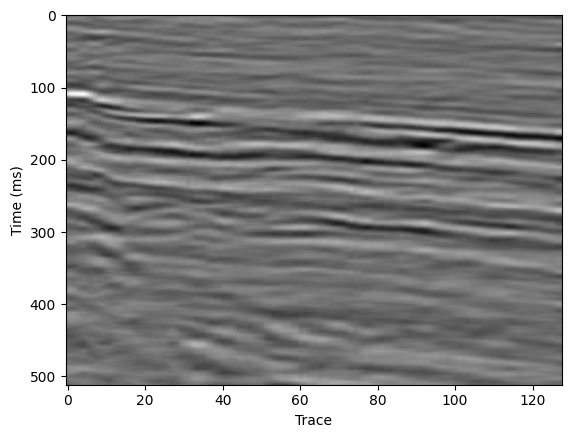

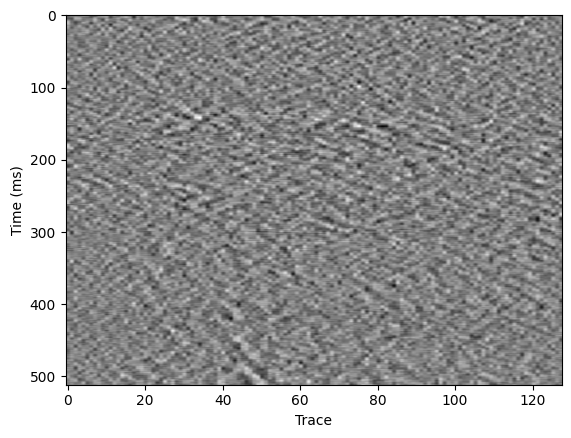

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(np.transpose(dataNoise), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Data Noise')
plt.show()

plt.figure()
plt.imshow(np.transpose(out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Output')
plt.show()

plt.figure()
plt.imshow(np.transpose(dataNoise - out), cmap='gray', aspect='auto')
plt.ylabel('Time (ms)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('Trace')
#plt.title('Difference')
plt.show()

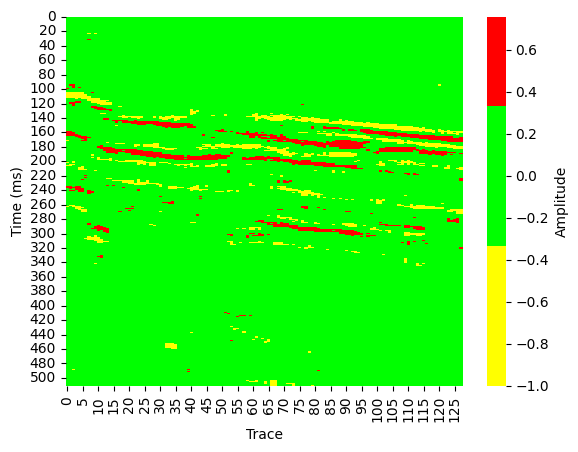

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define colors
red = '#FF0000'
yellow = '#FFFF00'
green = '#00FF00'

# Create a gradient colormap
cmap = sns.color_palette([yellow, green, red], as_cmap=True)

# Example usage with heatmap
# heatmap_data = ... # your data here
# plt.imshow(heatmap_data, cmap=cmap, vmin=-1, vmax=1)

# create a matrix of differences
diff_matrix = np.transpose(dataNoise) - np.transpose(out) * 2

# create a heatmap using seaborn
ax = sns.heatmap(diff_matrix, cmap=cmap, center=0)

# Set the colorbar title
cbar = ax.collections[0].colorbar
cbar.set_label('Amplitude')

plt.xlabel('Trace')
plt.ylabel('Time (ms)')
plt.show()


In [ ]:
# Marmousi Model Test

In [ ]:
from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, Average, Lambda, Conv1D,LeakyReLU
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
import numpy as np
import matplotlib.pyplot as plt



corr1=0
corr2=1
corr3=1

mat = scipy.io.loadmat ('marmousi_data.mat')
dataNoise = mat['variable_name']
print(dataNoise.shape)
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
print(dataNoise.shape)
INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]


input_img = Input(shape=(INPUT_SIZE2,))


# Encoder
encoded1 = Dense(512, activation = 'relu')(input_img)
encoded2 = Dense(256, activation = 'relu')(encoded1)
encoded3 = Dense(128, activation = 'relu')(encoded2)

# Decoder
decoded1 = Dense(128, activation = 'relu')(encoded3)
decoded2 = Dense(256, activation = 'relu')(decoded1)
decoded3 = Dense(512, activation = 'relu')(decoded2)

# Final Layer
decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)




def correlation_coefficient_loss(y_true, y_pred):
    #optional
    x = y_true - y_pred
    y = y_pred

    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den
    r =  corr1 -r

    #1
    x1 = y_true
    y1 = y_pred
    mx1 = K.mean(x1)
    my1 = K.mean(y1)
    xm1, ym1 = x1-mx1, y1-my1
    r_num1 = K.sum(tf.multiply(xm1,ym1))
    r_den1 = K.sqrt(tf.multiply(K.sum(K.square(xm1)), K.sum(K.square(ym1))))
    r1 = r_num1 / r_den1
    r1 = corr2 -  r1

    # Optional
    '''
    x2 = y_true-y_pred
    y2 = y_true
    mx2 = K.mean(x2)
    my2 = K.mean(y2)
    xm2, ym2 = x2-mx2, y2-my2
    r_num2 = K.sum(tf.multiply(xm2,ym2))
    r_den2 = K.sqrt(tf.multiply(K.sum(K.square(xm2)), K.sum(K.square(ym2))))
    r2 = r_num2 / r_den2
    r2 =    corr3 - (K.maximum(K.minimum(r2, 1.0), -1.0))
    '''
    return   K.square(r1) + K.square(r)




autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001) #I made a change here
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss=[correlation_coefficient_loss])
#autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =INPUT_SIZE2

# Initialization of the DDAE parameters using the parameters obtained by the synthetic example,
#in the paper we use more than one synthetich examples to obtain these parameters. However, here,
#we just show the flow of the DDAE by using only one synthetic example.

for i in range(2,7):
    w = DDAE.layers[i].get_weights()
    autoencoder.layers[i].set_weights(w)

tic()
history = autoencoder.fit(dataNoise,dataNoise, epochs=500, batch_size=batch, shuffle=True)
toc()



(141, 681)
(681, 141)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 141)]             0         
                                                                 
 dense_49 (Dense)            (None, 512)               72704     
                                                                 
 dense_50 (Dense)            (None, 256)               131328    
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                                 
 dense_52 (Dense)            (None, 128)               16512     
                                                                 
 dense_53 (Dense)            (None, 256)               33024     
                                                                 
 dense_54 (Dense)            (None, 5

In [ ]:
out = autoencoder.predict(dataNoise)


22/22 [==============================] - 0s 4ms/step


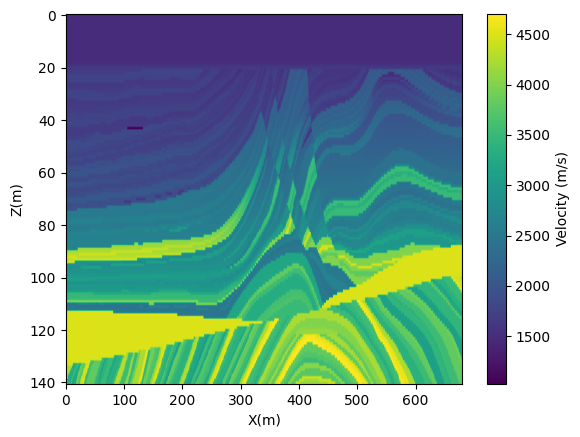

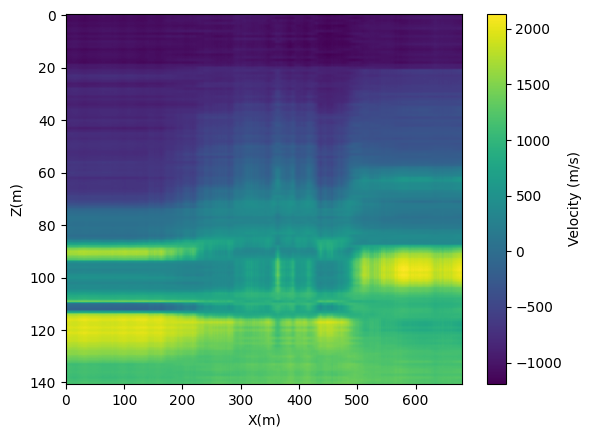

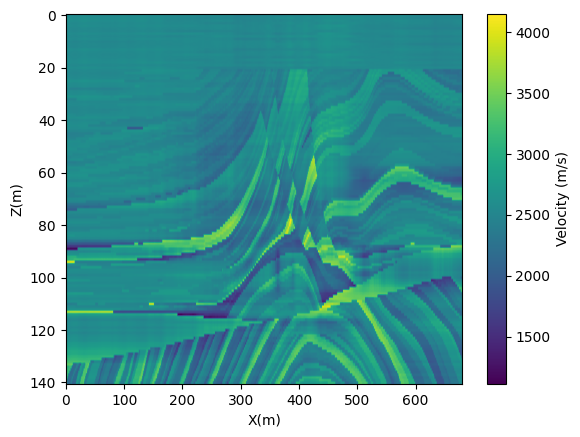

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(np.transpose(dataNoise), aspect='auto')
plt.ylabel('Z(m)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('X(m)')
#plt.title('Data Noise')
plt.colorbar(label='Velocity (m/s)')
plt.show()

plt.figure()
plt.imshow(np.transpose(out), aspect='auto')
plt.ylabel('Z(m)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('X(m)')
#plt.title('Output')
plt.colorbar(label='Velocity (m/s)')
plt.show()

plt.figure()
plt.imshow(np.transpose(dataNoise - out), aspect='auto')
plt.ylabel('Z(m)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('X(m)')
#plt.title('Difference')
plt.colorbar(label='Velocity (m/s)')
plt.show()


In [1]:
# Overthrust Model Test

In [ ]:
from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, Average, Lambda, Conv1D,LeakyReLU
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
import numpy as np
import matplotlib.pyplot as plt



corr1=0
corr2=1
corr3=1

mat = scipy.io.loadmat ('overthrust_data.mat')
dataNoise = mat['dn1']
print(dataNoise.shape)
dataNoise = np.transpose(dataNoise)
dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
print(dataNoise.shape)
INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]


input_img = Input(shape=(INPUT_SIZE2,))


# Encoder
encoded1 = Dense(512, activation = 'relu')(input_img)
encoded2 = Dense(256, activation = 'relu')(encoded1)
encoded3 = Dense(128, activation = 'relu')(encoded2)

# Decoder
decoded1 = Dense(128, activation = 'relu')(encoded3)
decoded2 = Dense(256, activation = 'relu')(decoded1)
decoded3 = Dense(512, activation = 'relu')(decoded2)

# Final Layer
decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)




def correlation_coefficient_loss(y_true, y_pred):
    #optional
    x = y_true - y_pred
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den
    r =  corr1 -r

    #1
    x1 = y_true
    y1 = y_pred
    mx1 = K.mean(x1)
    my1 = K.mean(y1)
    xm1, ym1 = x1-mx1, y1-my1
    r_num1 = K.sum(tf.multiply(xm1,ym1))
    r_den1 = K.sqrt(tf.multiply(K.sum(K.square(xm1)), K.sum(K.square(ym1))))
    r1 = r_num1 / r_den1
    r1 = corr2 -  r1

    # Optional
    '''
    x2 = y_true-y_pred
    y2 = y_true
    mx2 = K.mean(x2)
    my2 = K.mean(y2)
    xm2, ym2 = x2-mx2, y2-my2
    r_num2 = K.sum(tf.multiply(xm2,ym2))
    r_den2 = K.sqrt(tf.multiply(K.sum(K.square(xm2)), K.sum(K.square(ym2))))
    r2 = r_num2 / r_den2
    r2 =    corr3 - (K.maximum(K.minimum(r2, 1.0), -1.0))
    '''
    return   K.square(r1) + K.square(r)




autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001) #I made a change here
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss=[correlation_coefficient_loss])
#autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =INPUT_SIZE2

# Initialization of the DDAE parameters using the parameters obtained by the synthetic example,
#in the paper we use more than one synthetich examples to obtain these parameters. However, here,
#we just show the flow of the DDAE by using only one synthetic example.

for i in range(2,7):
    w = DDAE.layers[i].get_weights()
    autoencoder.layers[i].set_weights(w)

tic()
history = autoencoder.fit(dataNoise,dataNoise, epochs=500, batch_size=batch, shuffle=True)
toc()



(187, 801)
(801, 187)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 187)]             0         
                                                                 
 dense_56 (Dense)            (None, 512)               96256     
                                                                 
 dense_57 (Dense)            (None, 256)               131328    
                                                                 
 dense_58 (Dense)            (None, 128)               32896     
                                                                 
 dense_59 (Dense)            (None, 128)               16512     
                                                                 
 dense_60 (Dense)            (None, 256)               33024     
                                                                 
 dense_61 (Dense)            (None, 5

26/26 [==============================] - 0s 5ms/step


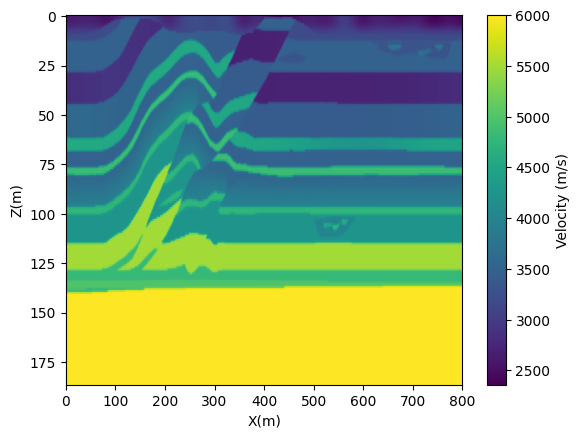

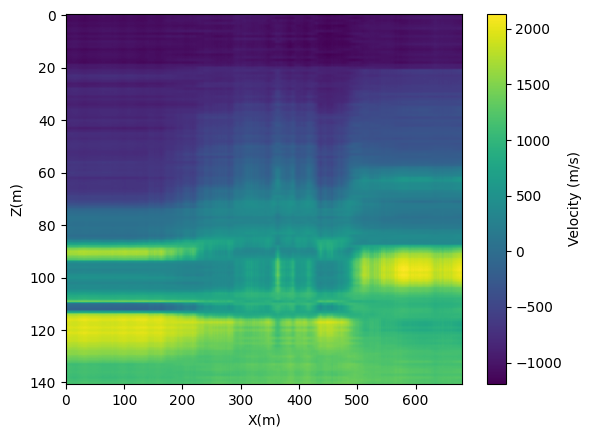

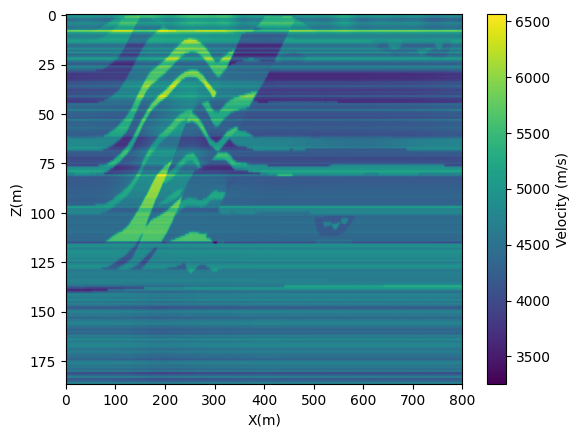

In [ ]:
out_ = autoencoder.predict(dataNoise)
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(np.transpose(dataNoise), aspect='auto')
plt.ylabel('Z(m)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('X(m)')
#plt.title('Data Noise')
plt.colorbar(label='Velocity (m/s)')
plt.show()

plt.figure()
plt.imshow(np.transpose(out), aspect='auto')
plt.ylabel('Z(m)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('X(m)')
#plt.title('Output')
plt.colorbar(label='Velocity (m/s)')
plt.show()

plt.figure()
plt.imshow(np.transpose(dataNoise - out_), aspect='auto')
plt.ylabel('Z(m)')
#plt.yticks(np.arange(len(time_axis)), time_axis)
plt.xlabel('X(m)')
#plt.title('Difference')
plt.colorbar(label='Velocity (m/s)')
plt.show()
